# Bioinformatics, Interdisplinary (Data Science - Biology) Preliminary Drug Discovery

Prerequisites:
- Drug Candidate, would have high potency and specificity to inhibit its molecular target without off-target effect
- pIC50, Negavitve logrithm of IC50 in Molar Concentration, Which is Half-maximal inhibitory concentration.


## what is the problem?
We have Thousands of drug candidates for our target protien "Human DiHydroOrotate DeHydrogenase" which is a Validated Therapeutic Target for autoimmune diaseases such as rheumatoid arthritis and multiple sclerosis. So, we need a way to predict the potential Drug candidate.

## What are the things we can do to find a solution?
 - End goal of the project, Find a way to Identify Potential Drug Candidate given a target  protien.
 - Identify drug databases, To make informed decision on characteristics/features of a Drug
 - Do we need a ML Model. If yes, Supervised or Unsupervised. Depends on the Binomial or Ranking of potential Drug Candidate.

# Plan Stage

 - Test for basic Drug candidate characteristics: Biological Activity, Chemical and Metabolic Activity, Low toxic effects
 - Identified a database which aligned with our needs (), it also had python library. So, we can use python to work for this project
 - Gather the data and select prelimnary features

In [3]:
! pip install chembl_webresource_client


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 9.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import os
def clear():
    os.system( 'cls' )

In [5]:
targets = new_client.target

target_query = targets.search('Human DiHydroOrotate DeHydrogenase')


targets = pd.DataFrame.from_dict(target_query)

targets

cross_references  ...  tax_id
0                                                   []  ...   36329
1                                                   []  ...    5664
2                                                   []  ...  746128
3    [{'xref_id': 'Q02127', 'xref_name': None, 'xre...  ...    9606
4    [{'xref_id': 'O35435', 'xref_name': None, 'xre...  ...   10090
..                                                 ...  ...     ...
886                                                 []  ...    9606
887                                                 []  ...    9685
888                                                 []  ...    9796
889                                                 []  ...    9606
890                                                 []  ...    9606

[891 rows x 9 columns]

In [6]:
file_name = 'Human DiHydroOrotate DeHydrogenase'

Selected Row 4 (index - 3) as Target, The protien is of Homo sapiens with score 26 :
https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL1966/

In [7]:
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL1966'

Searching through Chembl to find molecules with IC50 values as filter, which is a measure of a drug's efficacy

In [8]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

Create a Dataframe of the result.

In [9]:
df = pd.DataFrame.from_dict(res)
df

action_type  ...   value
0                                                  None  ...    50.0
1                                                  None  ...   840.0
2                                                  None  ...   410.0
3                                                  None  ...    20.0
4                                                  None  ...  5700.0
...                                                 ...  ...     ...
1872  {'action_type': 'INHIBITOR', 'description': 'N...  ...     0.8
1873                                               None  ...  1200.0
1874  {'action_type': 'INHIBITOR', 'description': 'N...  ...    37.5
1875  {'action_type': 'INHIBITOR', 'description': 'N...  ...    0.41
1876  {'action_type': 'INHIBITOR', 'description': 'N...  ...   0.007

[1877 rows x 46 columns]

In [10]:
df.to_csv(file_name + '_01_bioactivity_data_raw.csv', index=False)

# Analyze Stage 2

 - Understand data
 - Data Exploration and Structing
 - Exploraing Features
 - Feature Engineering

Let's make a copy of raw df and work on that.

In [11]:
drug_candidates = df.copy()

In [12]:
df.shape

(1877, 46)

There is 1874 rows and 46 columns

In [13]:
drug_candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                273 non-null    object
 1   activity_comment           446 non-null    object
 2   activity_id                1877 non-null   int64 
 3   activity_properties        1877 non-null   object
 4   assay_chembl_id            1877 non-null   object
 5   assay_description          1877 non-null   object
 6   assay_type                 1877 non-null   object
 7   assay_variant_accession    0 non-null      object
 8   assay_variant_mutation     0 non-null      object
 9   bao_endpoint               1877 non-null   object
 10  bao_format                 1877 non-null   object
 11  bao_label                  1877 non-null   object
 12  canonical_smiles           1877 non-null   object
 13  data_validity_comment      83 non-null     object
 14  data_val

Many null values and unwanted columns are present.

## Remove null values
As stated on plan stage, we need mainly work on Biological activity, chemical and metabolica activities, so we retain only those.
- Standard_value - Represents Biological Activty
- Canonical_smiles - line notation for describing chemical structures : https://chem.libretexts.org/Courses/University_of_Arkansas_Little_Rock/ChemInformatics_(2017)%3A_Chem_4399_5399/2.3%3A_Chemical_Representations_on_Computer%3A_Part_III

In [14]:
drug_candidates = drug_candidates[drug_candidates.standard_value.notna()]
drug_candidates = drug_candidates[drug_candidates.canonical_smiles.notna()]
print(f" Rows:{drug_candidates.shape[0]} and Columns:{drug_candidates.shape[1]}")

 Rows:1640 and Columns:46


More than 200 rows of null values are dropped

In [15]:
print(f"Unique Smiles: {len(drug_candidates.canonical_smiles.unique())}")
print(f"Duplicates Smiles: {len(drug_candidates.canonical_smiles) - len(drug_candidates.canonical_smiles.unique())}")

Unique Smiles: 1488
Duplicates Smiles: 152


In [16]:
drug_candidates = drug_candidates.drop_duplicates(['canonical_smiles'])
print(len(drug_candidates.canonical_smiles), "Matches the above unique smiles")

1488 Matches the above unique smiles


In [17]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
drug_selected_columns = drug_candidates[selection]
drug_selected_columns.head(5)

molecule_chembl_id  ... standard_value
0       CHEMBL154151  ...           50.0
1       CHEMBL157004  ...          840.0
2       CHEMBL348270  ...          410.0
3       CHEMBL345464  ...           20.0
4       CHEMBL154214  ...         5700.0

[5 rows x 3 columns]

In [18]:
drug_selected_columns.to_csv(file_name + '_02_bioactivity_data_preprocessed.csv', index=False)

In [19]:
drug_selected_columns = pd.read_csv(file_name + '_02_bioactivity_data_preprocessed.csv')

Creating a Class Categorical variable with Standard_values as thressholds

In [20]:
bioactivity_threshold = []
for i in drug_selected_columns.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append('Inactive')
  elif float(i) <= 1000:
    bioactivity_threshold.append('active')
  else:
    bioactivity_threshold.append('Intermediate')

In [21]:
bioactivity_class = pd.Series(bioactivity_threshold, name="class")
drug_selected_columns = pd.concat([drug_selected_columns, bioactivity_class], axis=1)
drug_selected_columns.head(5)

molecule_chembl_id  ...         class
0       CHEMBL154151  ...        active
1       CHEMBL157004  ...        active
2       CHEMBL348270  ...        active
3       CHEMBL345464  ...        active
4       CHEMBL154214  ...  Intermediate

[5 rows x 4 columns]

In [22]:
drug_selected_columns.to_csv(file_name + '_03_bioactivity_data_curated.csv', index=False)

In [23]:
! zip NS3.zip *.csv

updating: Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv (deflated 93%)
updating: Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv (deflated 82%)
updating: Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv (deflated 83%)
  adding: descriptors_output.csv (deflated 96%)
  adding: Human DiHydroOrotate DeHydrogenase_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
  adding: Human DiHydroOrotate DeHydrogenase_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: Human DiHydroOrotate DeHydrogenase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: Human DiHydroOrotate DeHydrogenase_Predicted_pIC50_values.csv (deflated 74%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)


In [24]:
! ls -l

total 130368
-rw-r--r-- 1 repl repl  2656725 Apr 11 08:57  descriptors_output.csv
-rw-r--r-- 1 repl repl  7207015 Apr 15 13:05 'EDA - Drug Discovery .ipynb'
-rw-r--r-- 1 repl repl  1216837 Apr 15 13:07 'Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 repl repl   102847 Apr 15 13:07 'Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 repl repl   115879 Apr 15 13:07 'Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 repl repl   197361 Apr 11 08:56 'Human DiHydroOrotate DeHydrogenase_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 repl repl   161583 Apr 11 08:56 'Human DiHydroOrotate DeHydrogenase_05_bioactivity_data_2class_pIC50.csv'
-rw-r--r-- 1 repl repl  2655848 Apr 11 08:57 'Human DiHydroOrotate DeHydrogenase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
-rw-r--r-- 1 repl repl    22649 Apr 15 08:02 'Human DiHydroOrotate DeHydrogenase_Predicted_pIC50_values.csv'
drwxr-xr-x 3 repl repl 

# Exploratory Data Analysis (EDA) 

plays a pivotal role in the drug discovery process, acting as a powerful tool for scientists to uncover patterns, spot anomalies, and test hypotheses. Let's dive into how EDA facilitates this intricate process, making it more efficient and insightful.

Firstly, EDA helps in understanding the underlying distribution of data. In drug discovery, it's crucial to know how different biological and chemical properties are distributed across compounds. This understanding can guide researchers in selecting compounds with desirable properties for further testing.

Secondly, EDA enables the identification of relationships between variables. By visualizing these relationships, scientists can identify potential predictors of drug efficacy. For instance, a strong correlation between a compound's molecular weight and its ability to inhibit a particular protein might be discovered through EDA. This insight can streamline the selection process for candidate molecules.

Moreover, outlier detection is another area where EDA proves invaluable. Outliers can indicate experimental errors, extraordinary compounds, or novel findings. Identifying these outliers early in the drug discovery process ensures that resources are focused on the most promising compounds and that data quality is maintained.

Additionally, EDA facilitates hypothesis generation. By exploring the data without preconceived notions, unexpected patterns can emerge, leading to new hypotheses about compound behavior or target interactions. These hypotheses can then be tested in experimental settings, driving innovation in drug discovery.

Lastly, EDA supports feature selection and dimensionality reduction. In the context of drug discovery, datasets often contain a vast number of features (e.g., molecular descriptors), not all of which are relevant for predicting drug activity. EDA techniques can help identify the most informative features, reducing the complexity of the data and improving the performance of predictive models.

In summary, EDA is not just a preliminary step in drug discovery but a foundational component that informs and enhances every stage of the process. By providing deep insights into the data, EDA enables researchers to make informed decisions, ultimately accelerating the path to new therapeutic discoveries.

In [25]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-04-15 13:07:10--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   164MB/s    in 0.5s    

2024-04-15 13:07:11 (164 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 392: /usr/local/conda.exe: Permission denied
chmod: cannot access '/usr/local/conda.exe': No such file or directory
Unpacking payload ...
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 404: /usr/local/conda.exe: No such file or directory
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 406: /usr/local/conda.exe: No such 

In [26]:
df = pd.read_csv(file_name + '_03_bioactivity_data_curated.csv')
df.isna().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
class                 0
dtype: int64

In [27]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [28]:
smiles = []
for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [29]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles.head(5)

molecule_chembl_id  ...                                   canonical_smiles
0       CHEMBL154151  ...  CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...
1       CHEMBL157004  ...  O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...
2       CHEMBL348270  ...          O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1
3       CHEMBL345464  ...  O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...
4       CHEMBL154214  ...  O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...

[5 rows x 4 columns]

In [30]:
df_clean_smiles.shape
print(df_clean_smiles.isna().sum())

molecule_chembl_id    0
standard_value        0
class                 0
canonical_smiles      0
dtype: int64


Calculate Lipinski Descriptors

In [31]:
!pip install rdkit
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 55.6 MB/s eta 0:00:00:00:0100:01
Defaulting to user installation because normal site-packages is not writeable


In [32]:
# Ensure you have RDKit installed in your environment before running this code
# You can install RDKit by running: !conda install -c conda-forge rdkit
import numpy as np
# Assuming RDKit is now installed
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

#Preprocessing
from sklearn.preprocessing import MinMaxScaler

## Lipinski's Rule of Five

Lipinski's Rule of Five, also known as the Pfizer's Rule of Five, is a set of guidelines for determining whether a chemical compound with a certain pharmacological or biological activity has properties that would make it a likely orally active drug in humans. The rule was formulated by Christopher A. Lipinski in 1997, based on the observation that most orally administered drugs have certain common properties.

The rule states that, in general, an orally active drug has no more than one violation of the following criteria:

- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds).
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms).
- A molecular mass less than 500 daltons.
- An octanol-water partition coefficient (log P) not greater than 5.

Lipinski's Rule of Five is important in drug discovery because it serves as a heuristic to gauge the druglikeness of a compound. Compounds that conform to the rules are more likely to have the properties that would make them suitable for oral administration, including absorption, distribution, metabolism, and excretion (ADME). The rule helps medicinal chemists and pharmacologists to focus their drug discovery efforts on compounds that have the appropriate physical and chemical properties to be orally active drugs, potentially saving time and resources in the drug development process.

In [33]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [34]:
df_clean_smiles.canonical_smiles.astype

<bound method NDFrame.astype of 0       CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl...
1       O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc...
2               O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1
3       O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(...
4       O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc...
                              ...                        
1483    CCn1c(CO)nn(-c2nc(O[C@@H](C)C(F)(F)F)c(C(=O)Nc...
1484    CCn1c(CO)nn(-c2nc(O[C@@H](C)C(F)(F)F)c(C(=O)Nc...
1485    CCn1c(CO)nn(-c2nc(O[C@@H](C)C(F)(F)F)c(C(=O)Nc...
1486    CCn1c(CO)nn(-c2nc(O[C@@H](C)C(F)(F)F)c(C(=O)Nc...
1487    CCn1c(CO)nn(-c2nc(O[C@@H](C)C(F)(F)F)c(C(=O)Nc...
Name: canonical_smiles, Length: 1488, dtype: object>

In [35]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head(5)

MW    LogP  NumHDonors  NumHAcceptors
0  384.863  4.5766         2.0            3.0
1  459.342  5.7746         2.0            3.0
2  307.349  3.8572         2.0            2.0
3  425.790  5.4092         2.0            3.0
4  409.335  4.8949         2.0            3.0

In [36]:
df_combined = pd.concat([df,df_lipinski],axis=1)

In [37]:
df_combined

molecule_chembl_id  ... NumHAcceptors
0          CHEMBL154151  ...           3.0
1          CHEMBL157004  ...           3.0
2          CHEMBL348270  ...           2.0
3          CHEMBL345464  ...           3.0
4          CHEMBL154214  ...           3.0
...                 ...  ...           ...
1483      CHEMBL5186161  ...          10.0
1484      CHEMBL5193821  ...          10.0
1485      CHEMBL5201357  ...          10.0
1486      CHEMBL5197655  ...          10.0
1487      CHEMBL5206111  ...          10.0

[1488 rows x 8 columns]

Converting IC50 values to pIC50 is a common practice in drug discovery and medicinal chemistry for several reasons:

1. **Normalization and Scaling**: IC50 values can span a wide range of magnitudes, making it difficult to compare them directly or visualize them on the same scale. Converting to pIC50, which is the negative logarithm (base 10) of the IC50 value, normalizes these values, allowing for easier comparison and visualization.

2. **Biological Relevance**: pIC50 values provide a more intuitive understanding of a compound's potency. Higher pIC50 values indicate greater potency, as they represent lower IC50 values. This inverse relationship aligns with the biological interpretation that lower concentrations needed to inhibit a target are indicative of higher potency.

3. **Statistical Analysis**: The conversion to pIC50 often results in a dataset that is more amenable to statistical analysis and modeling. Many statistical methods assume normally distributed data, and converting IC50 to pIC50 can help meet this assumption, especially when dealing with a wide range of IC50 values.

4. **Standardization**: Using pIC50 values helps standardize reporting and comparison of results across different studies and publications. This standardization is crucial for meta-analyses and systematic reviews.


In [38]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [39]:
df_combined.standard_value.describe()

count      1488.000000
mean      31107.563748
std       59486.608141
min           0.120000
25%          71.350000
50%        1560.000000
75%       43750.000000
max      524400.000000
Name: standard_value, dtype: float64

In [40]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [41]:
df_norm = norm_value(df_combined)
df_norm

molecule_chembl_id  ... standard_value_norm
0          CHEMBL154151  ...               50.00
1          CHEMBL157004  ...              840.00
2          CHEMBL348270  ...              410.00
3          CHEMBL345464  ...               20.00
4          CHEMBL154214  ...             5700.00
...                 ...  ...                 ...
1483      CHEMBL5186161  ...                0.56
1484      CHEMBL5193821  ...                0.30
1485      CHEMBL5201357  ...               10.00
1486      CHEMBL5197655  ...               11.00
1487      CHEMBL5206111  ...                0.80

[1488 rows x 8 columns]

In [42]:
df_norm.standard_value_norm.describe()

count      1488.000000
mean      31107.563748
std       59486.608141
min           0.120000
25%          71.350000
50%        1560.000000
75%       43750.000000
max      524400.000000
Name: standard_value_norm, dtype: float64

In [43]:
df_final = pIC50(df_norm)
df_final

molecule_chembl_id  ...     pIC50
0          CHEMBL154151  ...  7.301030
1          CHEMBL157004  ...  6.075721
2          CHEMBL348270  ...  6.387216
3          CHEMBL345464  ...  7.698970
4          CHEMBL154214  ...  5.244125
...                 ...  ...       ...
1483      CHEMBL5186161  ...  9.251812
1484      CHEMBL5193821  ...  9.522879
1485      CHEMBL5201357  ...  8.000000
1486      CHEMBL5197655  ...  7.958607
1487      CHEMBL5206111  ...  9.096910

[1488 rows x 8 columns]

In [44]:
df_final.pIC50.describe()

count    1488.000000
mean        5.883335
std         1.547890
min         3.280337
25%         4.359209
50%         5.806875
75%         7.146632
max         9.920819
Name: pIC50, dtype: float64

In [45]:
df_final.to_csv(file_name+'_04_bioactivity_data_3class_pIC50.csv')

In [46]:
df_2class = df_final[df_final['class'] != 'Intermediate'] #imp
df_2class

molecule_chembl_id  ...     pIC50
0          CHEMBL154151  ...  7.301030
1          CHEMBL157004  ...  6.075721
2          CHEMBL348270  ...  6.387216
3          CHEMBL345464  ...  7.698970
5          CHEMBL157105  ...  7.481486
...                 ...  ...       ...
1483      CHEMBL5186161  ...  9.251812
1484      CHEMBL5193821  ...  9.522879
1485      CHEMBL5201357  ...  8.000000
1486      CHEMBL5197655  ...  7.958607
1487      CHEMBL5206111  ...  9.096910

[1232 rows x 8 columns]

In [47]:
df_2class.to_csv( file_name +'_05_bioactivity_data_2class_pIC50.csv')

Lipinki Descriptors

In [48]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

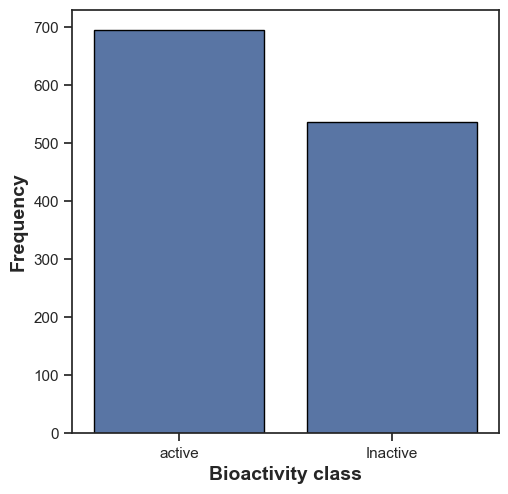

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

x = plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold', )
y = plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')

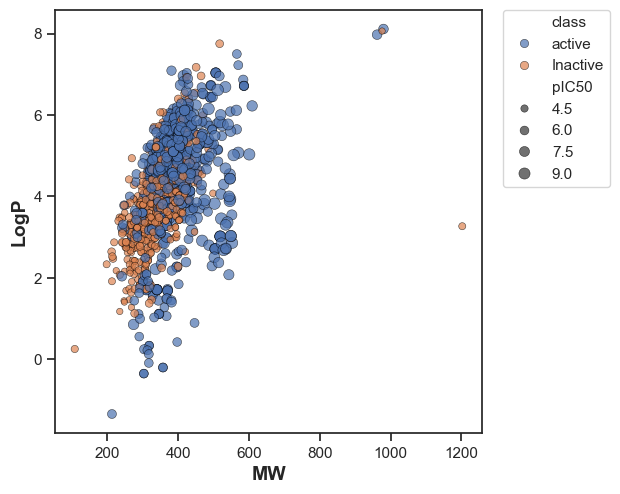

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

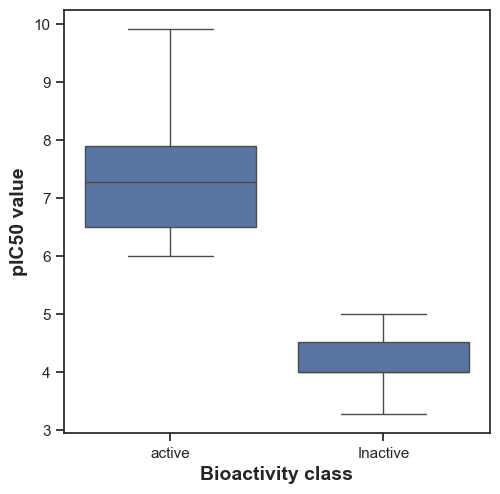

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### Significance of pIC50 Values

The pIC50 value is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. This value is the negative logarithm of the IC50 value, which is the concentration of a drug at which it inhibits a biological process by 50%. In the context of drug discovery, a high pIC50 value indicates a more potent inhibitor because it corresponds to a lower IC50 value, meaning that a smaller concentration of the drug is required to achieve the desired inhibitory effect.

A low pIC50 value suggests that higher concentrations of the drug are needed for the same effect, which may not be desirable in a therapeutic context. Therefore, when comparing compounds, those with higher pIC50 values are generally more favorable as potential drug candidates, assuming other pharmacological properties such as selectivity and toxicity are acceptable.

### Importance of the Mann-Whitney U Test

The Mann-Whitney U test is a non-parametric statistical test that is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed. It is the non-parametric alternative to the t-test for independent samples.

In the field of data analysis, especially in biomedical research, the Mann-Whitney U test is important because it does not assume a normal distribution of the data, making it more robust in situations where the data may be skewed or have outliers. This test helps to determine if there are statistically significant differences between two groups, which can be crucial in the early stages of drug development to compare the effects of different compounds or treatments.

By using the Mann-Whitney U test, researchers can make informed decisions about which compounds to pursue further, based on evidence that there is a real difference in their effects. This can save time and resources by focusing on the most promising candidates. Additionally, the test can be used to analyze a wide range of data types, which adds to its versatility and utility in research.

In [52]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]
    
  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'Inactive']
  inactive = inactive[descriptor]
# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [53]:
mannwhitney('pIC50')

Descriptor  Statistics  ...  alpha                      Interpretation
0      pIC50    373215.0  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

Let's understand what this means,

So, we have classified our data into Active and Inactive states throught EDA above.
After doing that we find that pIC50 values seems to have considerable differentiating factor between two sets.
To Test that we are implemeting the above Hypotheses, 

H null : There is no Difference

H Alternative : There is Different

From the above results we can infer, that there is differece and it is Statistically Significant. Which is taken from p values which is less than the alpha (Significance Level) = 0.05 (5%)  by being less than the alpha we reject the H Null hypotheses.

MW


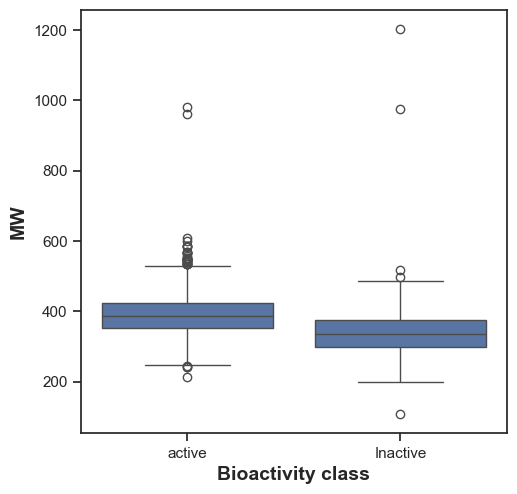

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [55]:
mannwhitney('MW')

Descriptor  Statistics  ...  alpha                      Interpretation
0         MW    278696.5  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

LogP

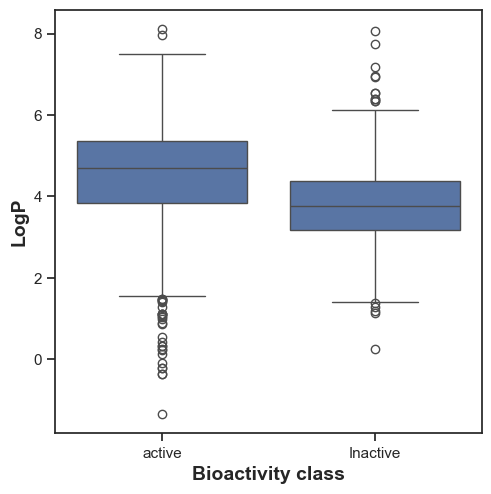

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [57]:
mannwhitney('LogP')

Descriptor  Statistics  ...  alpha                      Interpretation
0       LogP    258200.0  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

NumHDonors


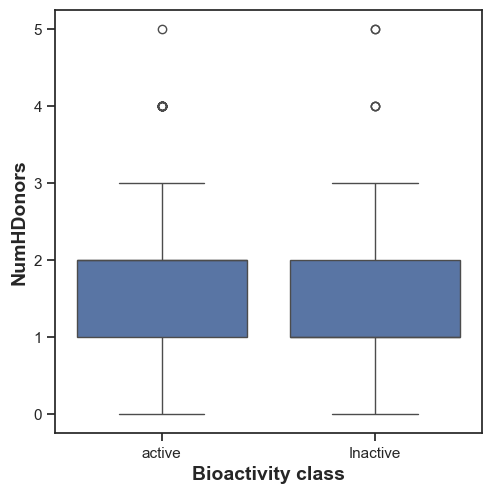

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [59]:
mannwhitney('NumHDonors')

Descriptor  Statistics  ...  alpha                      Interpretation
0  NumHDonors    222660.0  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

NumHAcceptors

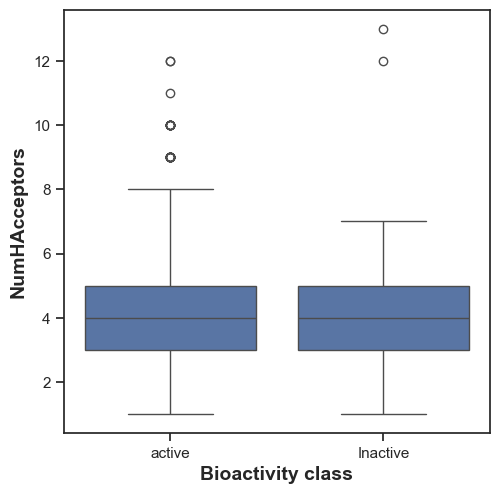

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [61]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics  ...  alpha                      Interpretation
0  NumHAcceptors    198601.5  ...   0.05  Different distribution (reject H0)

[1 rows x 5 columns]

We have finished conducting our hypotheses and the least p Values we could get was from pIC50 which is 1.914491765e-200.
We will be taking that as our Y values for performning Random Forest Regression.

In [62]:
! zip -r results.zip . -i *.csv *.pdf

updating: Human DiHydroOrotate DeHydrogenase_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
updating: Human DiHydroOrotate DeHydrogenase_04_bioactivity_data_3class_pIC50.csv (deflated 78%)
updating: plot_LogP.pdf (deflated 38%)
updating: Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv (deflated 82%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: mannwhitneyu_LogP.csv (deflated 9%)
updating: plot_NumHAcceptors.pdf (deflated 39%)
updating: plot_MW.pdf (deflated 39%)
updating: Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv (deflated 83%)
updating: Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv (deflated 93%)
updating: mannwhitneyu_pIC50.csv (deflated 12%)
updating: mannwhitneyu_NumHDonors.csv (deflated 12%)
updating: plot_MW_vs_LogP.pdf (deflated 4%)
updating: plot_NumHDonors.pdf (deflated 39%)
updating: plot_ic

#Descriptor Calculation and Dataset Preparation

In [63]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-04-15 13:07:35--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-04-15 13:07:35--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  --.-KB/s    in 0.05s   

2024-04-15 13:07:36 (472 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2024-04-15 13:07:36--  https://gi

In [64]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [65]:
df3 = pd.read_csv(file_name + '_04_bioactivity_data_3class_pIC50.csv', index_col=0)

In [66]:
df3

molecule_chembl_id  ...     pIC50
0          CHEMBL154151  ...  7.301030
1          CHEMBL157004  ...  6.075721
2          CHEMBL348270  ...  6.387216
3          CHEMBL345464  ...  7.698970
4          CHEMBL154214  ...  5.244125
...                 ...  ...       ...
1483      CHEMBL5186161  ...  9.251812
1484      CHEMBL5193821  ...  9.522879
1485      CHEMBL5201357  ...  8.000000
1486      CHEMBL5197655  ...  7.958607
1487      CHEMBL5206111  ...  9.096910

[1488 rows x 8 columns]

In [67]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [68]:
! cat molecule.smi

CN(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl)cc1	CHEMBL154151
O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)cc2C(F)(F)F)CCC1	CHEMBL157004
O=C(O)C1=C(C(=O)Nc2ccc(-c3ccccc3)cc2)CCC1	CHEMBL348270
O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc(OC(F)(F)F)c3)c(Cl)c2)CCC1	CHEMBL345464
O=C(O)C1=C(C(=O)Nc2ccc(-c3ccc(OC(F)(F)F)cc3)cc2F)CCC1	CHEMBL154214
O=C(O)C1=C(C(=O)Nc2c(F)cc(-c3cccc(OC(F)(F)F)c3)cc2F)CCC1	CHEMBL157105
COc1ccccc1-c1c(F)c(F)c(NC(=O)C2=C(C(=O)O)CCC2)c(F)c1F	CHEMBL345701
COc1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)c(Cl)c2)cc1	CHEMBL358435
COc1ccc(-c2cc(F)c(NC(=O)C3=C(C(=O)O)CCC3)c(F)c2)c(OC)c1	CHEMBL345652
O=C(O)C1=C(C(=O)Nc2c(F)cc(-c3ccccc3Cl)cc2F)CCC1	CHEMBL345147
Cc1cc(-c2cccc(OC(F)(F)F)c2)ccc1NC(=O)C1=C(C(=O)O)CCC1	CHEMBL155597
O=C(O)C1=C(C(=O)Nc2ccc(-c3cccc4ccccc34)cc2C(F)(F)F)CCC1	CHEMBL349577
O=C(O)C1=C(C(=O)Nc2c(F)cc(-c3ccccc3F)cc2F)CCC1	CHEMBL154513
CC(C)(C)c1ccc(-c2ccc(NC(=O)C3=C(C(=O)O)CCC3)cc2Cl)cc1	CHEMBL157164
O=C(O)C1=C(C(=O)Nc2c(F)c(F)c(-c3cccc(OC(F)(F)F)c3)c(F)c2F)CCC1	CHEMBL154623
C

In [69]:
! cat molecule.smi | wc -l

1488


Calculate fingerprint descriptors

In [70]:
! bash padel.sh

Processing CHEMBL154151 in molecule.smi (1/1488). 
Processing CHEMBL157004 in molecule.smi (2/1488). 
Processing CHEMBL348270 in molecule.smi (3/1488). Average speed: 2.31 s/mol.
Processing CHEMBL345464 in molecule.smi (4/1488). Average speed: 1.16 s/mol.
Processing CHEMBL154214 in molecule.smi (5/1488). Average speed: 0.96 s/mol.
Processing CHEMBL157105 in molecule.smi (6/1488). Average speed: 0.73 s/mol.
Processing CHEMBL345701 in molecule.smi (7/1488). Average speed: 0.64 s/mol.
Processing CHEMBL358435 in molecule.smi (8/1488). Average speed: 0.54 s/mol.
Processing CHEMBL345652 in molecule.smi (9/1488). Average speed: 0.50 s/mol.
Processing CHEMBL345147 in molecule.smi (10/1488). Average speed: 0.45 s/mol.
Processing CHEMBL155597 in molecule.smi (11/1488). Average speed: 0.42 s/mol.
Processing CHEMBL349577 in molecule.smi (12/1488). Average speed: 0.39 s/mol.
Processing CHEMBL154513 in molecule.smi (13/1488). Average speed: 0.40 s/mol.
Processing CHEMBL157164 in molecule.smi (14/148

In [71]:
! ls -l

total 240192
-rw-r--r-- 1 repl repl  2656725 Apr 15 13:13  descriptors_output.csv
-rw-r--r-- 1 repl repl  8619443 Apr 15 13:13 'EDA - Drug Discovery .ipynb'
-rw-r--r-- 1 repl repl  1216837 Apr 15 13:07 'Human DiHydroOrotate DeHydrogenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 repl repl   102847 Apr 15 13:07 'Human DiHydroOrotate DeHydrogenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 repl repl   115879 Apr 15 13:07 'Human DiHydroOrotate DeHydrogenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 repl repl   197367 Apr 15 13:07 'Human DiHydroOrotate DeHydrogenase_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 repl repl   161447 Apr 15 13:07 'Human DiHydroOrotate DeHydrogenase_05_bioactivity_data_2class_pIC50.csv'
-rw-r--r-- 1 repl repl  2655848 Apr 11 08:57 'Human DiHydroOrotate DeHydrogenase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
-rw-r--r-- 1 repl repl    22649 Apr 15 08:02 'Human DiHydroOrotate DeHydrogenase_Predicted_pIC50_values.csv'
drwxr-xr-x 3 repl repl 

In [72]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop('Name',axis=1)

In [73]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df3_X)
df3_X.head(5)

PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP878  PubchemFP879  PubchemFP880
0           1           1           1  ...             0             0             0
1           1           1           0  ...             0             0             0
2           1           1           1  ...             0             0             0
3           1           1           0  ...             0             0             0
4           1           1           0  ...             0             0             0

[5 rows x 881 columns]

In [74]:

df3_X.head(5)

PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP878  PubchemFP879  PubchemFP880
0           1           1           1  ...             0             0             0
1           1           1           0  ...             0             0             0
2           1           1           1  ...             0             0             0
3           1           1           0  ...             0             0             0
4           1           1           0  ...             0             0             0

[5 rows x 881 columns]

In [75]:
df3_Y = df3['pIC50']
df3_Y

0       7.301030
1       6.075721
2       6.387216
3       7.698970
4       5.244125
          ...   
1483    9.251812
1484    9.522879
1485    8.000000
1486    7.958607
1487    9.096910
Name: pIC50, Length: 1488, dtype: float64

Combine x and y

In [76]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP879  PubchemFP880     pIC50
0              1           1           1  ...             0             0  7.301030
1              1           1           0  ...             0             0  6.075721
2              1           1           1  ...             0             0  6.387216
3              1           1           0  ...             0             0  7.698970
4              1           1           0  ...             0             0  5.244125
...          ...         ...         ...  ...           ...           ...       ...
1483           1           1           1  ...             0             0  9.251812
1484           1           1           1  ...             0             0  9.522879
1485           1           1           1  ...             0             0  8.000000
1486           1           1           1  ...             0             0  7.958607
1487           1           1           1  ...             0             0  9.096910

[1488 rows x 882 columns]

In [77]:
dataset3.to_csv( file_name + '_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# Construct Stage 3


Regression models, particularly those employing Random Forest algorithms, play a pivotal role in the drug discovery process, especially when identifying potential drug candidates for specific targets like Human Dihydroorotate Dehydrogenase (DHODH). The significance of these models in drug discovery can be outlined as follows:

1. **Predictive Accuracy**: Random Forest is known for its high accuracy in regression tasks. It can handle complex datasets with multiple input features, making it ideal for predicting the biological activity (e.g., pIC50 values) of chemical compounds against a target like DHODH. This predictive capability is crucial for identifying compounds with the desired therapeutic effects.

2. **Handling Multidimensional Data**: Drug discovery datasets often contain a vast array of features (e.g., molecular descriptors and fingerprints) that describe the chemical properties of compounds. Random Forest can efficiently process these multidimensional datasets, identifying the most relevant features that contribute to a compound's activity against the target.

3. **Robustness to Overfitting**: The ensemble nature of Random Forest, where multiple decision trees are combined, helps in reducing the risk of overfitting. This is particularly important in drug discovery, where models need to generalize well to unseen data to reliably predict the activity of new compounds.

4. **Importance of Features**: Random Forest models can provide insights into the importance of different features (e.g., molecular descriptors) in predicting the activity of compounds. This information can guide medicinal chemists in designing new drug candidates with optimized properties for inhibiting DHODH.

5. **Versatility in Data Types**: These models can handle various types of data, including continuous and categorical variables, without the need for extensive preprocessing. This flexibility is beneficial in drug discovery, where datasets can vary widely in format and composition.

6. **Speed and Scalability**: Random Forest models can be trained relatively quickly and are scalable to large datasets, an essential feature given the vast number of compounds that need to be screened in the early stages of drug discovery.

In summary, the application of Random Forest regression models in drug discovery for targets like Human DHODH enables the efficient and accurate identification of promising drug candidates. These models facilitate the exploration of vast chemical spaces and the optimization of compound properties, accelerating the development of new therapeutics.

In [78]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [108]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [148]:
df = pd.read_csv(file_name + '_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


The dataframe X holds all the features/paramaters/Xindependent/predictor Variables

In [149]:
X = df.drop('pIC50', axis=1)

X.head(5)

PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP878  PubchemFP879  PubchemFP880
0           1           1           1  ...             0             0             0
1           1           1           0  ...             0             0             0
2           1           1           1  ...             0             0             0
3           1           1           0  ...             0             0             0
4           1           1           0  ...             0             0             0

[5 rows x 881 columns]

The Series Y is all the observed values. which is used to train the model.

In [150]:
df.pIC50.to_csv(file_name + "_Predicted_pIC50_values.csv", index=False)
Y = df.pIC50
Y

0      7.30
1      6.08
2      6.39
3      7.70
4      5.24
       ... 
1483   9.25
1484   9.52
1485   8.00
1486   7.96
1487   9.10
Name: pIC50, Length: 1488, dtype: float64

Below we can see that, we have 881 featres and 1448 data points in X

In [151]:
X.shape

(1488, 881)

Series Y holds 1488 Datapoints which are the the observed results in the context of regression Analysis

In [152]:
Y.shape

(1488,)

In [153]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

Here From the above script and below results, we are making sure the features used have a plausible(.8 > variance Threshold) impact on the Regression Analysis and only using those.

In [86]:
X.shape

(1488, 169)

**We are splitting dataset in Train and Test**

The purpose is to Test our trained model for overfitting or underfitting,
which could occur when perfomring Regression models with large features/parameters/ Xindepent variables.

These are also called hold out samples.

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [174]:
X_train.shape, Y_train.shape

((1190, 169), (1190,))

In [175]:
X_test.shape, Y_test.shape

((298, 169), (298,))

Hyperparameter tuning, also known as hyperparameter optimization, is the process of finding the optimal set of parameters (hyperparameters) for a machine learning model. Hyperparameters are the configuration settings used to structure the model, which are set before the training process begins and remain constant during training. Unlike model parameters, which are learned during training, hyperparameters must be set by the data scientist and can significantly affect the performance of the model.

### Why is Hyperparameter Tuning Important?

- **Improves Model Performance:** Properly tuned hyperparameters can lead to better model accuracy or lower loss.
- **Model Generalization:** Helps in finding a model that not only performs well on the training data but also generalizes well to unseen data.
- **Efficiency:** Can reduce overfitting, underfitting, and sometimes even reduce the computational cost by finding the optimal model size or learning process.

### Common Hyperparameters

- **Learning Rate:** Determines the step size at each iteration while moving toward a minimum of a loss function.
- **Number of Estimators:** In ensemble methods like RandomForest, it's the number of trees in the forest.
- **Regularization Parameters:** In models like logistic regression or support vector machines, these parameters can help prevent overfitting.
- **Kernel and Gamma in SVM:** Determines the type of hyperplane and influence of data points in the classification decision, respectively.

### Methods of Hyperparameter Tuning

1. **Grid Search:** Exhaustively searches through a manually specified subset of the hyperparameter space.
2. **Random Search:** Randomly searches the hyperparameter space and provides a good trade-off between exploration and exploitation.
3. **Bayesian Optimization:** Uses a probabilistic model to predict the performance of the model and chooses hyperparameters to minimize the model's loss.
4. **Gradient-based Optimization:** Uses gradient descent to optimize hyperparameters.
5. **Evolutionary Algorithms:** Uses mechanisms inspired by biological evolution, such as reproduction, mutation, recombination, and selection.

### Conclusion

Hyperparameter tuning is a crucial step in the machine learning workflow. It can significantly impact the effectiveness and efficiency of the model. However, it can also be computationally expensive, so choosing the right strategy and understanding the model's sensitivity to hyperparameters is essential.

We'll be using RandomSearch

In [176]:
rfc = RandomForestRegressor()

#all possible parameters available for RandomForestRegressor
rfc.get_params()                                                                    

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Parameter Grid

In [177]:
#We'll be testing for these below combinations of Parameters

# Number of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop=2000, num=10)]

#max number of features considered for splitting node
max_features = ['auto', 'sqrt']

#max number of levels in each decision tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

#min number of data points placed in node before the node is split
min_samples_split = [2, 5, 10]

#min number of data points allowed in a leaf node
min_samples_leaf = [1, 2, 4]

#method for sampling data points
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [178]:
rf_random = RandomizedSearchCV(estimator = rfc,
                              param_distributions = random_grid,
                              n_iter = 100,
                              cv = 3,
                              verbose=2,
                              random_state=42,
                              n_jobs=-1)

In [179]:
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1577; total time=   9.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=311; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=311; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=311; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1577; total time=   2.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1577; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [180]:
rf_random.best_params_

{'n_estimators': 522,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [181]:
def evaluate(model, X_test, Y_test):
    predictions = model.predict(X_test)
    score = metrics.r2_score(Y_test, predictions )
    errors = abs(predictions - Y_test)
    mape = 100 * np.mean(errors/ Y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Score: {:.3f}'.format(score))

In [182]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

Model Performance
Average Error: 0.5637 degrees.
Accuracy = 90.15%.
Score: 0.770


In [183]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

Model Performance
Average Error: 0.5629 degrees.
Accuracy = 90.19%.
Score: 0.777


Let's compare several ML algorithms, regression models of `DHODH`

In [184]:
clf = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
train, test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [04:05<00:00,  5.85s/it]


In [185]:
train

Adjusted R-Squared  ...  Time Taken
Model                                                        ...            
RandomForestRegressor                                  0.47  ...        1.22
HistGradientBoostingRegressor                          0.47  ...        0.48
LGBMRegressor                                          0.45  ...       11.40
BaggingRegressor                                       0.41  ...        0.13
MLPRegressor                                           0.40  ...       15.50
KNeighborsRegressor                                    0.40  ...        0.10
GradientBoostingRegressor                              0.38  ...        0.54
SVR                                                    0.38  ...        0.29
XGBRegressor                                           0.37  ...        0.80
NuSVR                                                  0.36  ...        0.20
LassoCV                                                0.21  ...       12.29
RidgeCV                                                0.21  ...        0.21
ElasticNetCV                                           0.21  ...       13.00
BayesianRidge                                          0.21  ...        0.40
HuberRegressor                                         0.20  ...        2.87
SGDRegressor                                           0.20  ...        0.12
PoissonRegressor                                       0.19  ...        0.29
Ridge                                                  0.18  ...        0.28
LinearSVR                                              0.16  ...        0.39
OrthogonalMatchingPursuitCV                            0.11  ...        0.28
OrthogonalMatchingPursuit                              0.11  ...        0.02
ExtraTreesRegressor                                    0.09  ...        1.50
ExtraTreeRegressor                                     0.08  ...        0.12
DecisionTreeRegressor                                  0.07  ...        0.12
GammaRegressor                                         0.02  ...        0.19
TweedieRegressor                                       0.02  ...        0.11
LassoLarsCV                                           -0.01  ...        0.59
LassoLarsIC                                           -0.04  ...        0.50
PassiveAggressiveRegressor                            -0.25  ...        0.11
AdaBoostRegressor                                     -0.27  ...        0.28
LarsCV                                                -0.27  ...        1.11
ElasticNet                                            -0.95  ...        0.07
QuantileRegressor                                     -1.32  ...      158.50
LassoLars                                             -1.33  ...        0.11
Lasso                                                 -1.33  ...        0.11
DummyRegressor                                        -1.33  ...        0.02
GaussianProcessRegressor                             -21.49  ...        0.90
KernelRidge                                          -32.02  ...        0.40
LinearRegression                  -305135569745640226816.00  ...        0.30
TransformedTargetRegressor        -305135569745640226816.00  ...        0.18
RANSACRegressor                -828498494446635174592512.00  ...       18.90
Lars                          -1583659663404929988427776.00  ...        0.23

[42 rows x 4 columns]

In [186]:
test

Adjusted R-Squared  ...  Time Taken
Model                                                        ...            
RandomForestRegressor                                  0.47  ...        1.22
HistGradientBoostingRegressor                          0.47  ...        0.48
LGBMRegressor                                          0.45  ...       11.40
BaggingRegressor                                       0.41  ...        0.13
MLPRegressor                                           0.40  ...       15.50
KNeighborsRegressor                                    0.40  ...        0.10
GradientBoostingRegressor                              0.38  ...        0.54
SVR                                                    0.38  ...        0.29
XGBRegressor                                           0.37  ...        0.80
NuSVR                                                  0.36  ...        0.20
LassoCV                                                0.21  ...       12.29
RidgeCV                                                0.21  ...        0.21
ElasticNetCV                                           0.21  ...       13.00
BayesianRidge                                          0.21  ...        0.40
HuberRegressor                                         0.20  ...        2.87
SGDRegressor                                           0.20  ...        0.12
PoissonRegressor                                       0.19  ...        0.29
Ridge                                                  0.18  ...        0.28
LinearSVR                                              0.16  ...        0.39
OrthogonalMatchingPursuitCV                            0.11  ...        0.28
OrthogonalMatchingPursuit                              0.11  ...        0.02
ExtraTreesRegressor                                    0.09  ...        1.50
ExtraTreeRegressor                                     0.08  ...        0.12
DecisionTreeRegressor                                  0.07  ...        0.12
GammaRegressor                                         0.02  ...        0.19
TweedieRegressor                                       0.02  ...        0.11
LassoLarsCV                                           -0.01  ...        0.59
LassoLarsIC                                           -0.04  ...        0.50
PassiveAggressiveRegressor                            -0.25  ...        0.11
AdaBoostRegressor                                     -0.27  ...        0.28
LarsCV                                                -0.27  ...        1.11
ElasticNet                                            -0.95  ...        0.07
QuantileRegressor                                     -1.32  ...      158.50
LassoLars                                             -1.33  ...        0.11
Lasso                                                 -1.33  ...        0.11
DummyRegressor                                        -1.33  ...        0.02
GaussianProcessRegressor                             -21.49  ...        0.90
KernelRidge                                          -32.02  ...        0.40
LinearRegression                  -305135569745640226816.00  ...        0.30
TransformedTargetRegressor        -305135569745640226816.00  ...        0.18
RANSACRegressor                -828498494446635174592512.00  ...       18.90
Lars                          -1583659663404929988427776.00  ...        0.23

[42 rows x 4 columns]

## R-Squared Values for Trainset (more then better R2>70 and R2<90)

[(0.0, 1.0)]

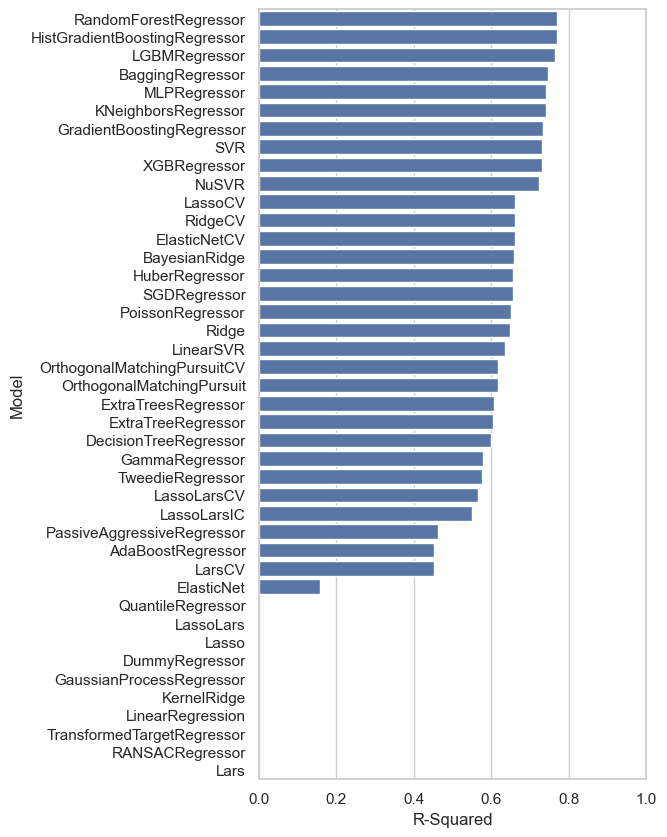

In [187]:
plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='R-Squared', data=train)
ax.set(xlim=(0,1))

# RMSE Value for Train set (less the better)

[(0.0, 1.0)]

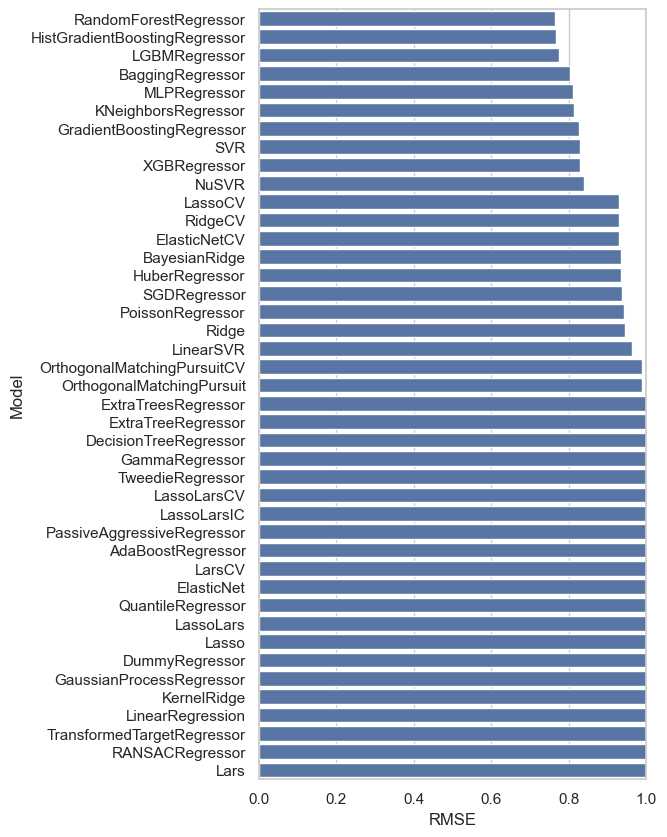

In [188]:
plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='RMSE', data=train)
ax.set(xlim=(0,1))

# Conclusion:

The trained models are showing highest of 77.8% R2 values. 
Which is a good result and we can work with that. As anything beyond 90% is prone to overfitting and underfitting is also a issue. This model can be utilised for preliminary screening of drug candidates in drug discovery workflow. 

## Improvements :
~~we can perform Cross-Validation to remove noise from the predicted model values, Which would be the next possible step from here after.
workflow will be Train -> Cross - validation 5k -> Test -> Champion model.~~ [COMPLETED]

We can also further explore features like Ligand Efficiency, through feature engineering we can extract meaningful direct.

# Use Case

In [189]:
import pickle

modelPickleFile = "pIC50_model.pkl"

with open(modelPickleFile, 'wb') as file:
    pickle.dump(model, file)

In [190]:
import pickle
model = pickle.load(open('pIC50_model.pkl','rb'))